A quick plot of moving average for monthly closing prices for etherium over a period of time. 
Dataset gotten from 
https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [37]:
df = pd.read_csv('coin_Ethereum.csv', parse_dates=True)

In [38]:
df['Date'] = pd.to_datetime(df.Date)
df['year_month'] = df['Date'].dt.strftime('%Y-%m-%d')
df['year_month'] = pd.to_datetime(df.year_month)

In [39]:
df.set_index('year_month', inplace=True)

In [40]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
year_month,,,,,,,,,,
2015-08-08,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
2015-08-09,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2015-08-10,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
2015-08-11,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
2015-08-12,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [44]:
monthly_close = df[df.Date.dt.is_month_end]

In [60]:
monthly_close.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,MA3,MA6,MA12
year_month,,,,,,,,,,,,,
2015-08-31,24,Ethereum,ETH,2015-08-31 23:59:59,1.396150,1.201010,1.321380,1.358240,1447180.0,9.896397e+07,NaN,NaN,NaN
2015-09-30,54,Ethereum,ETH,2015-09-30 23:59:59,0.746722,0.635861,0.661192,0.738644,619926.0,5.435147e+07,NaN,NaN,NaN
2015-10-31,85,Ethereum,ETH,2015-10-31 23:59:59,1.056380,0.900171,1.046580,0.916627,673892.0,6.816337e+07,1.004504,NaN,NaN
2015-11-30,115,Ethereum,ETH,2015-11-30 23:59:59,0.895054,0.847696,0.879951,0.873119,784439.0,6.558956e+07,0.842797,NaN,NaN
2015-12-31,146,Ethereum,ETH,2015-12-31 23:59:59,0.975414,0.910277,0.912098,0.933542,663994.0,7.085802e+07,0.907763,NaN,NaN


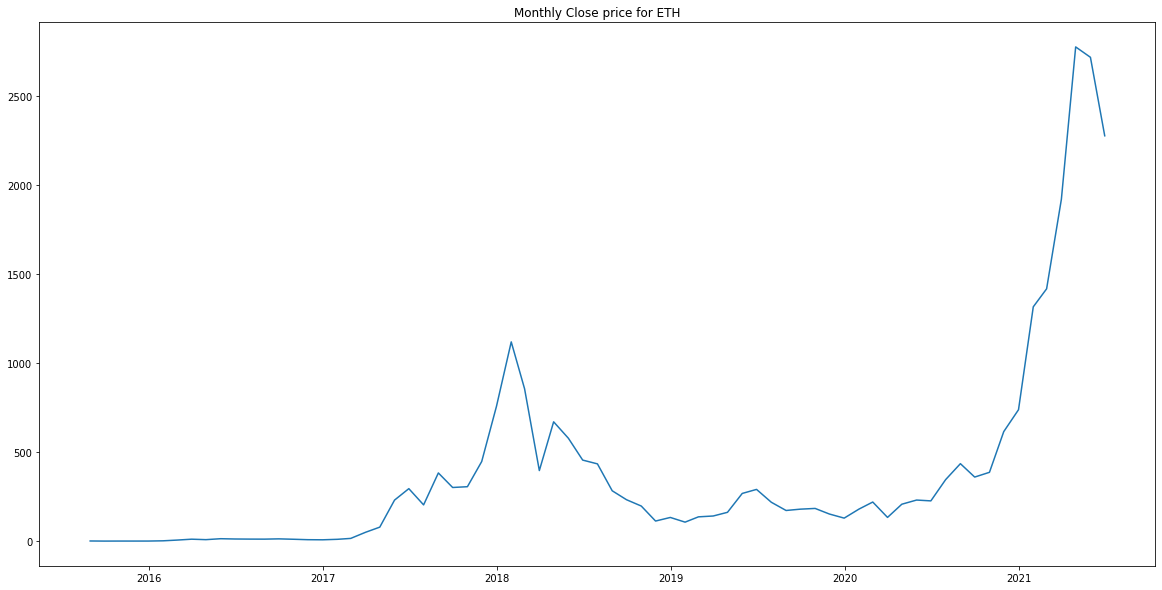

In [46]:
plt.figure(figsize=(20,10))
plt.title('Monthly Close price for ETH')
plt.plot(monthly_close[['Close']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

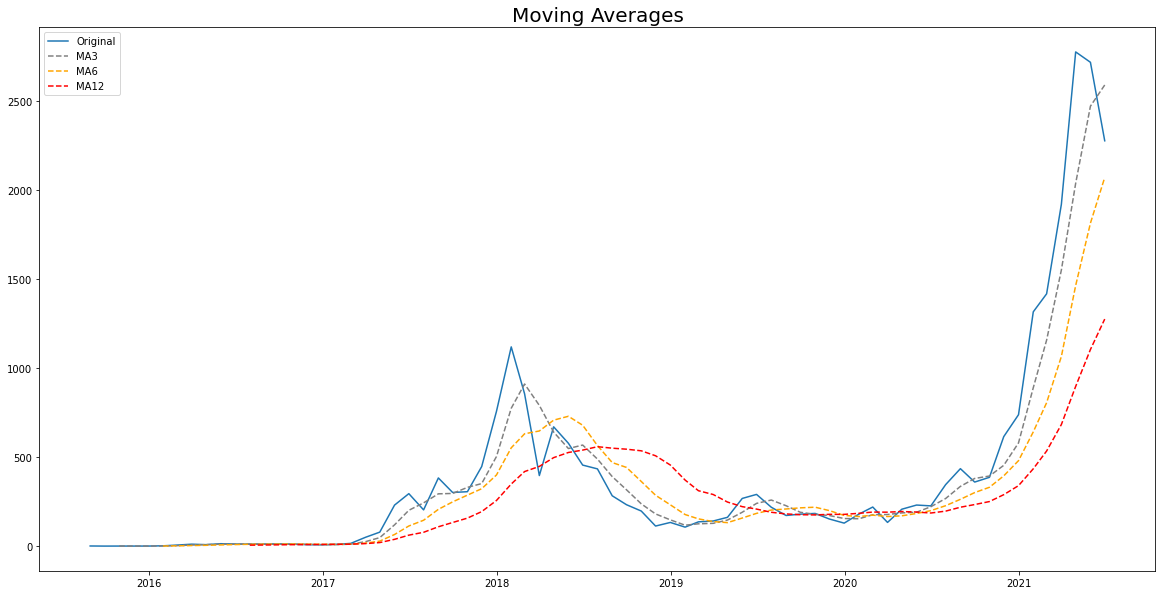

In [51]:
monthly_close['MA3'] = monthly_close['Close'].rolling(window=3).mean()
monthly_close['MA6'] = monthly_close['Close'].rolling(window=6).mean()
monthly_close['MA12'] = monthly_close['Close'].rolling(window=12).mean()

# Plot
plt.figure(figsize=(20,10))
plt.title('Simple Moving Averages', size=20)
plt.plot(monthly_close['Close'], label='Original')
plt.plot(monthly_close['MA3'], color='gray', label='MA3', ls='--')
plt.plot(monthly_close['MA6'], color='orange', label='MA6', ls='--')
plt.plot(monthly_close['MA12'], color='red', label='MA12',ls='--')
plt.legend();